<a href="https://colab.research.google.com/github/aksekhar/face_detection_system/blob/main/face_detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DOMAIN: Entertainment**

**CONTEXT:** Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis.
Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie
and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and
multimedia experts who need to detect faces from screen shots from the movie scene.
The data labelling is already done. Since there higher time complexity is involved in the

**DATA DESCRIPTION: **The dataset comprises of images and its mask for corresponding human face.

**PROJECT OBJECTIVE: **To build a face detection system.

**Import and Understand the data**

In [1]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model

*A. Import and read ‘images.npy'*

In [2]:
def mount_drive(fpath):
  try:
    from google.colab import drive
    drive.mount("/content/drive/", force_remount=True)
    google_drive_prefix = "/content/drive/My Drive"
    data_path = f"{google_drive_prefix}/{fpath}"
    print(data_path)
    return data_path
  except ModuleNotFoundError:
    data_prefix = f"{fpath}"

In [3]:
fileName = mount_drive("/dataset/images.npy")

Mounted at /content/drive/
/content/drive/My Drive//dataset/images.npy


In [4]:
import numpy as np
data = np.load(fileName,allow_pickle = True)

[[[  4   0   1]
  [  0   3   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   2]
  [  5   1   2]]

 [[  0   2   1]
  [ 69  81  71]
  [ 72  79  71]
  ...
  [111 121 122]
  [113 122 121]
  [  0   0   0]]

 [[  0   0   0]
  [ 71  83  71]
  [ 70  81  67]
  ...
  [113 123 125]
  [114 122 124]
  [  0   0   0]]

 ...

 [[  0   3   0]
  [ 68  76  65]
  [ 67  78  62]
  ...
  [145 155 120]
  [133 143 106]
  [  0   1   3]]

 [[  1   1   0]
  [ 69  72  61]
  [ 67  73  59]
  ...
  [148 155 121]
  [137 145 104]
  [  0   1   3]]

 [[  1   1   3]
  [  1   1   1]
  [  0   0   2]
  ...
  [  0   0   0]
  [  0   0   2]
  [  0   0   0]]]


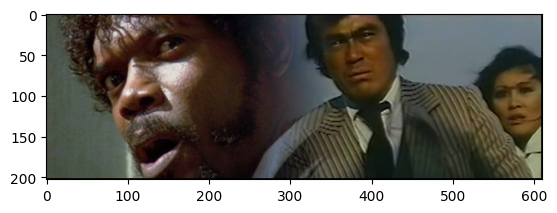

In [5]:
import matplotlib.pyplot as plt
import cv2
print(data[70][0])
plt.imshow(data[70][0])

In [6]:
data[70][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.05901639344262295, 'y': 0.04433497536945813},
   {'x': 0.460655737704918, 'y': 0.9753694581280788}],
  'imageWidth': 610,
  'imageHeight': 203},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5131147540983606, 'y': 0.04926108374384237},
   {'x': 0.760655737704918, 'y': 0.5812807881773399}],
  'imageWidth': 610,
  'imageHeight': 203},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.8967213114754098, 'y': 0.2315270935960591},
   {'x': 1, 'y': 0.6600985221674877}],
  'imageWidth': 610,
  'imageHeight': 203}]

b. Split the data into Features(X) & labels(Y). Unify shape of all the images.

**Imp Note:** Replace all the pixels within masked area with 1.

 ** Hint: X **will comprise of array of image whereas Y will comprise of coordinates of the mask(human face). Observe: data[0], data[0][0], data[0][1].

In [7]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

In [8]:
import tensorflow as tf
print('TensorFlow Version: ', tf.__version__)
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype = np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

TensorFlow Version:  2.15.0


*C. Split the data into train and test[400:9] *italicised text*

In [9]:
X_train = X[:400]
y_train = masks[:400]


X_test = X[400:]
y_test = masks[400:]

*D. Select random image from the train data and display original image and masked image.*

Shape of X_train:  (400, 224, 224, 3)
Shape of mask array:  (409, 224, 224)
[[[-0.57647061 -0.64705884 -0.56862748]
  [-0.48235291 -0.5529412  -0.48235291]
  [-0.60000002 -0.7019608  -0.69411767]
  ...
  [-0.35686272 -0.41960782 -0.41960782]
  [-0.35686272 -0.41960782 -0.41960782]
  [-0.35686272 -0.41960782 -0.40392154]]

 [[-0.5529412  -0.6156863  -0.54509807]
  [-0.48235291 -0.5529412  -0.48235291]
  [-0.60000002 -0.69411767 -0.64705884]
  ...
  [-0.35686272 -0.41960782 -0.41960782]
  [-0.35686272 -0.41960782 -0.41960782]
  [-0.35686272 -0.41960782 -0.41960782]]

 [[-0.56078434 -0.6156863  -0.54509807]
  [-0.47450978 -0.5529412  -0.48235291]
  [-0.60000002 -0.67843139 -0.60000002]
  ...
  [-0.35686272 -0.41960782 -0.41960782]
  [-0.35686272 -0.41960782 -0.41960782]
  [-0.35686272 -0.41960782 -0.41960782]]

 ...

 [[-0.47450978 -0.6156863  -0.63921571]
  [ 0.20784318 -0.02745098 -0.06666666]
  [ 0.16078436 -0.05098039 -0.09019607]
  ...
  [-0.09019607 -0.43529409 -0.42745095]
  [-0.10

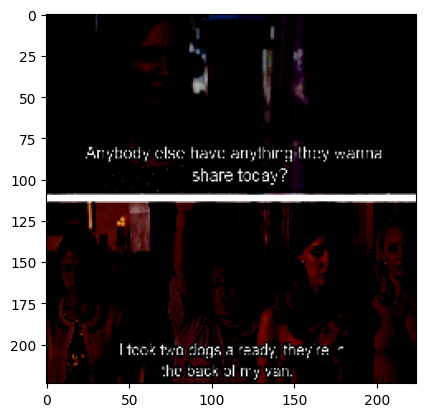

In [10]:
print('Shape of X_train: ', X_train.shape)
print('Shape of mask array: ', masks.shape)
i = 43
print(X_train[i])
plt.imshow(X_train[i])

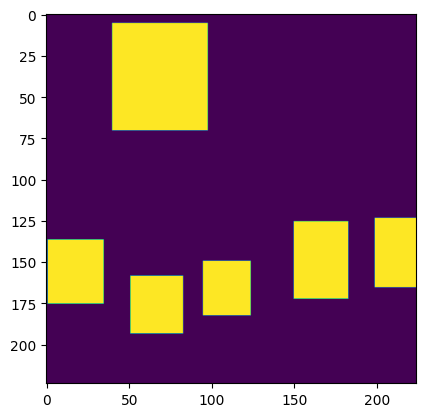

In [11]:
plt.imshow(masks[i])

**2. Model building**

*A. Design a face mask detection model.*

Hint: 1. Use MobileNet architecture for initial pre-trained non-trainable layers.

Hint: 2. Add appropriate Upsampling layers to imitate U-net architecture. *italicised text*

In [12]:
def create_cnn_model(trainable = True):
    IMG_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, 3)
    model = MobileNet(input_shape = IMG_SHAPE, alpha = 1.0, include_top = False, weights = 'imagenet')
    for layer in model.layers:
        layer.trainable = trainable

    block0 = model.get_layer('conv_pw_1_relu').output
    block1 = model.get_layer('conv_pw_3_relu').output
    block2 = model.get_layer('conv_pw_5_relu').output
    block3 = model.get_layer('conv_pw_11_relu').output
    block4 = model.get_layer('conv_pw_13_relu').output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size = 1, activation = "sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs = model.input, outputs = x)

In [13]:
model = create_cnn_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)         128       ['conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['conv1_bn[0][0]']        

*B. Design your own Dice Coefficient and Loss function*

In [14]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

In [15]:
def loss_params(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

In [16]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)
model.compile(loss=loss_params, optimizer=optimizer, metrics=[dice_coefficient])

*C. Train and tune the model as required*

In [17]:
#weight_file = mount_drive("/dataset/vgg_face_weights.h5")

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define the filepath with .weights.h5 extension
filepath = "/content/drive/MyDrive/dataset/vgg_face_weights.h5"

check_point = ModelCheckpoint(filepath, monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min")
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=1, callbacks=[check_point, reduce_lr, stop])

Epoch 1/10
146/400 [=========>....................] - ETA: 8:25 - loss: 148.4602

*D. Evaluate and share insights on performance of the model.*

*Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image.

In [ ]:
m = 3
plt.imshow(X_test[m])

In [ ]:
plt.imshow(masks[m])

In [ ]:
pred_mask = cv2.resize(1.0 * (model.predict(x=np.array([X_test[m]]))[0] > 0.5), (IMAGE_WIDTH, IMAGE_HEIGHT))

In [ ]:
plt.imshow(X_test[m])
plt.imshow(pred_mask, alpha=0.9)